In [1]:
!wget "https://github.com/pradeep-016/ML_Course/raw/refs/heads/main/8)%20Image%20Classification/SVM/Cars%20Dataset.zip"
!unzip "Cars Dataset.zip"

--2024-12-10 14:52:19--  https://github.com/pradeep-016/ML_Course/raw/refs/heads/main/8)%20Image%20Classification/SVM/Cars%20Dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pradeep-016/ML_Course/refs/heads/main/8)%20Image%20Classification/SVM/Cars%20Dataset.zip [following]
--2024-12-10 14:52:20--  https://raw.githubusercontent.com/pradeep-016/ML_Course/refs/heads/main/8)%20Image%20Classification/SVM/Cars%20Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38049454 (36M) [application/zip]
Saving to: ‘Cars Dataset.zip’

Cars Dataset.zip    100%[===================>]  36.29M  

In [2]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import hog
from skimage import exposure
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
train_dir = '/content/Cars Dataset/train'
test_dir = '/content/Cars Dataset/test'

In [4]:
def load_dataset(data_dir):
  images = []
  labels = []
  class_names = os.listdir(data_dir)
  for class_name in class_names:
    class_folder = os.path.join(data_dir, class_name)
    if os.path.isdir(class_folder):
      for filename in os.listdir(class_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
          img_path = os.path.join(class_folder, filename)
          img = cv2.imread(img_path)
          img = cv2.resize(img, (64, 64))
          images.append(img)
          labels.append(class_name)
  return np.array(images), np.array(labels)

In [5]:
train_images, train_labels = load_dataset(train_dir)
test_images, test_labels = load_dataset(test_dir)

In [6]:
def extract_features(images):
  hog_features = []
  for image in images:
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY )
    fd, hog_image = hog(gray, orientations = 9, pixels_per_cell=(8,8), cells_per_block = (2,2), visualize = True)
    hog_image_rescale = exposure.rescale_intensity(hog_image, in_range = (0, 10))
    hog_features.append(fd)
  return np.array(hog_features)

In [7]:
train_features = extract_features(train_images)
test_features = extract_features(test_images)

In [8]:
encoder = LabelEncoder()
train_labels_encoded = encoder.fit_transform(train_labels)
test_labels_encoded = encoder.fit_transform(test_labels)

In [9]:
svm_model = SVC(kernel = 'rbf',C = 1, gamma = 'scale', class_weight = 'balanced')
svm_model.fit(train_features, train_labels_encoded)

SVC(C=1, class_weight='balanced')

In [10]:
test_predictions = svm_model.predict(test_features)

In [11]:
accuracy = accuracy_score(test_labels_encoded, test_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(test_labels_encoded, test_predictions, target_names=encoder.classes_))

Test Accuracy: 66.05%

Classification Report:
                  precision    recall  f1-score   support

            Audi       0.69      0.72      0.71       199
   Hyundai Creta       0.53      0.67      0.59        67
Mahindra Scorpio       0.58      0.63      0.60        75
     Rolls Royce       0.42      0.41      0.41        74
           Swift       0.76      0.61      0.67       102
     Tata Safari       0.79      0.69      0.74       106
   Toyota Innova       0.70      0.72      0.71       190

        accuracy                           0.66       813
       macro avg       0.64      0.63      0.63       813
    weighted avg       0.67      0.66      0.66       813



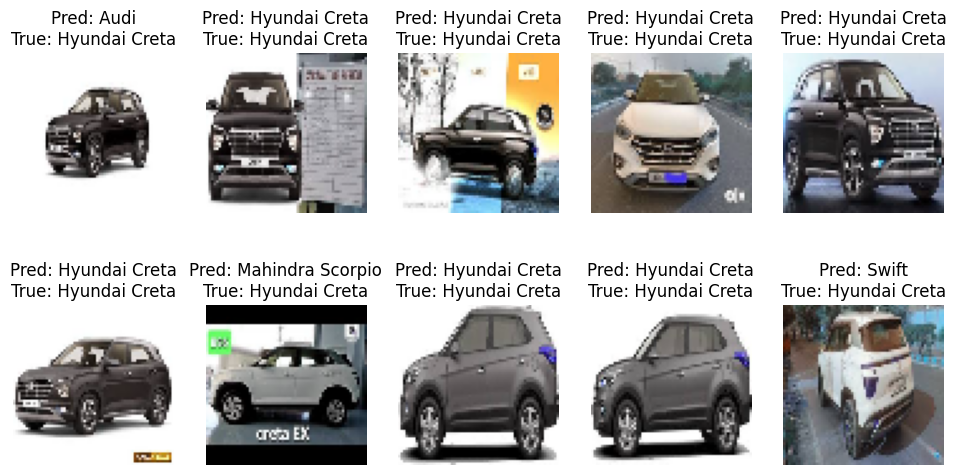

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i in np.arange(10):
    axes[i].imshow(test_images[i])
    axes[i].set_title(f"Pred: {encoder.classes_[test_predictions[i]]}\nTrue: {test_labels[i]}")
    axes[i].axis('off')
plt.show()